## Capstone Project: 
## Predicting Player's Transfer Values and Building a Transfer Recommendation System

## Background

Football, also known soccer in US and Canada, is a well renowned sport with 4 billion fans worldwide. It is particularly popular in Europe, South America and Africa. One reason for its popularity is due to its accessibility. To play football one only requires a football unlike other sports like golf where the equipments can be very costly. Hence, this sport can be played by both the poor and rich. 

Since the past decade, famous video gaming creators EA Sports has been coming out with yearly video game versions of football titled "FIFA" followed by the year. In the game, all players are rated based on real life performances and the ratings are updated weekly. Each player has an "overall score" which is determined by the player's attribute score for this particular position. The game also lists the players estimated transfer value based on real life transfer prices along with other features like the wages and nationality. Hence, this game is very realistic as it relates very closely to the real life situation.

## Problem Statement

I am the sporting director of General Assembly Football Club (GAFC). My main role is to recruit players which suits the profile of my football club to strengthen the current squad so as to achieve better results going forward.

The transfer market have been very busy all the time, with many players changing clubs constantly. There are many possible reasons for a player to seek a transfer elsewhere; more game time, playing for a more reputable club/league, higher wages etc. It is pretty common for players to play for as many as 6 clubs during their playing career compared the past whereby players usually stick to about 3 clubs throughout their career.

In the midst of these transfer frenzy between clubs and players, certain problems arises. Firstly, players' transfer fees are greatly inflated these days as clubs get richer mainly due to  (1) massive injection in capital from recent high profile takeovers by rich businesssmen, and (2) increased broadcasting revenue. Back then, a 35 million transfer fee would be deemed as a marquee signing. However, in recent times, a transfer of that value would be deemed as a normality as the top players in game are worth easily over 70 million.

In addition, many clubs tend to make impulse purchases, leading to many transfer being deemed as flops. It is important to consider the various characteristics and traits of a player and assess his suitability before making purchasing. Many clubs overlooked that and there is new pattern of buying players that are more well known and hyped up by the media. This leads to severe consequences as many clubs end up paying a hugely inflated transfer fee for a players that does not suit the clubs' needs. More often than not, the new purchase will most likely have a disappointing season and be deemed as a flop or failed transfer. As such, it deals a huge blow to the financials of football clubs especially the smaller ones which do not have much budget to spare with regards to transfers.

Therefore, this project aims to resolve the issues above by:

(1) Creating a regression model which correctly predicts a player's transfer value based on various features. The success metric would be accuracy. I am looking to find out how a change in certain variables can affect the change in players' value.

(2) Building a recommender system to filter out players which we can share with our scouting department to aid them in finding the right players for the club at the right price. It is also crucial to make sure departing key players are properly replaced with similar players. (eg. we need a clinical striker, with fantastic finishing and speed, preferably ard the range of 30-50 million).

The target audience for this project involves anyone associated with talent recruitment and scouting for footballers. I will be using the Fifa19 dataset from kaggle for this project. It has 19207 players with 89 features.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('max_rows',None)
%matplotlib inline
sns.set()

### Loading the Dataset

In [2]:
df = pd.read_csv('../data/fifa19.csv')

In [3]:
df.shape

(18207, 89)

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face'], axis=1, inplace=True)

We will remove unnecessary columns.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


## Data Preparation

In this section, i will be preparing the data for the modeling process later on. I will prepare 2 different variation of the dataset; with the former being a raw fifa19 dataset without much cleaning or feature engineering, and the latter being a cleaned fifa19 dataset with feature engineering. This is to allow me to test the models on both a raw and cleaned dataset to determine which model works best for which type of dataset.

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKR

In [8]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                           object
LF                           object
CF                          

In [9]:
for col in ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                    'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                    'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                    'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']:
    df[col] = df[col].astype('object')

### Checking for Missing Values

In [10]:
df.isnull().sum().sort_values(ascending=False)

Loaned From                 16943
RDM                          2085
LM                           2085
CB                           2085
LCB                          2085
LB                           2085
RWB                          2085
CDM                          2085
LDM                          2085
LWB                          2085
RM                           2085
RCM                          2085
CM                           2085
LCM                          2085
RAM                          2085
RB                           2085
CAM                          2085
LAM                          2085
RW                           2085
RF                           2085
CF                           2085
LF                           2085
LW                           2085
RS                           2085
ST                           2085
LS                           2085
RCB                          2085
Release Clause               1564
Joined                       1553
Contract Valid

## Preparing a Raw Dataset 

I will start off with preparing the raw dataset with minimal cleaning.

In [11]:
df_raw = df.copy()

In [12]:
df_raw.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88,68,58,51,15,13,5,10,13,€196.4M


In [13]:
df_raw.drop(['Loaned From', 'Joined'], axis=1, inplace=True)

In [14]:
df_raw.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [15]:
df_raw.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

#### Checking Out Missing Values and Dropping Them

In [16]:
df_raw.isnull().sum().sort_values(ascending=False)

Release Clause              1564
Contract Valid Until         289
Club                         241
Position                      60
Jersey Number                 60
Crossing                      48
LongPassing                   48
GKReflexes                    48
Curve                         48
Dribbling                     48
Volleys                       48
ShortPassing                  48
HeadingAccuracy               48
Finishing                     48
Height                        48
Weight                        48
Acceleration                  48
Body Type                     48
Work Rate                     48
Skill Moves                   48
Weak Foot                     48
International Reputation      48
Preferred Foot                48
BallControl                   48
FKAccuracy                    48
SprintSpeed                   48
Vision                        48
GKPositioning                 48
GKKicking                     48
GKHandling                    48
GKDiving  

In [17]:
df_raw.dropna(inplace=True)

#### Removing Special Characters

In [18]:
# Referenced from Nitin Datta
def value_converter(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df_raw['Value'] = df_raw['Value'].apply(value_converter)
df_raw['Wage'] = df_raw['Wage'].apply(value_converter)
df_raw['Release Clause'] = df_raw['Release Clause'].apply(value_converter)

In [19]:
df_raw['Work Rate'].replace('Medium/ Medium', 'Medium', inplace = True)
df_raw['Work Rate'].replace('High/ Medium', 'High', inplace = True)
df_raw['Work Rate'].replace('Medium/ High', 'Medium', inplace = True)
df_raw['Work Rate'].replace('High/ High', 'High', inplace = True)
df_raw['Work Rate'].replace('Medium/ Low', 'Medium', inplace = True)
df_raw['Work Rate'].replace('Low/ Medium', 'Low', inplace = True)
df_raw['Work Rate'].replace('Low/ High', 'Low', inplace = True)
df_raw['Work Rate'].replace('Low/ Low', 'Low', inplace = True)
df_raw['Work Rate'].replace('High/ Low', 'High', inplace = True)

In [20]:
df_raw['Contract Valid Until'].replace('Jun 30, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Dec 31, 2018', '2018',inplace = True)
df_raw['Contract Valid Until'].replace('May 31, 2020', '2020',inplace = True)
df_raw['Contract Valid Until'].replace('Jun 30, 2020', '2020',inplace = True)
df_raw['Contract Valid Until'].replace('May 31, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Dec 31, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 1, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jun 1, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 4, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 31, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 7, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 2, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 6, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Oct 14, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 3, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('May 4, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 12, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 25, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 18, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Dec 1, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Nov 30, 2018', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Feb 27, 2020', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 5, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 15, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 30, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 11, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace('Jan 20, 2019', '2019',inplace = True)
df_raw['Contract Valid Until'].replace(2020, '2020',inplace = True)

In [21]:
df_raw.shape

(16643, 55)

In [22]:
#df_raw.to_csv('../data/df_raw.csv', index=False)

## Preparing a Clean Dataset 

Now i will prepare the cleaned version of the Fifa19 dataset with appropriate imputing of missing values and added feature engineering.

### Dropping Redundant Columns

Firstly, i will drop all the individual position data as i will be classifying them into more distinct positions later on.

In [23]:
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

I will also proceed to drop the other redundant columns.

In [24]:
df.drop(['Loaned From', 'Release Clause', 'Joined', 'Jersey Number'], axis=1, inplace=True)


### Imputing Missing Values

In [25]:
df.isnull().sum().sort_values(ascending=False)

Contract Valid Until        289
Club                        241
Position                     60
GKReflexes                   48
Crossing                     48
LongPassing                  48
GKPositioning                48
Curve                        48
Dribbling                    48
Volleys                      48
ShortPassing                 48
HeadingAccuracy              48
Finishing                    48
Height                       48
Weight                       48
Acceleration                 48
Body Type                    48
Work Rate                    48
Skill Moves                  48
Weak Foot                    48
International Reputation     48
Preferred Foot               48
BallControl                  48
FKAccuracy                   48
SprintSpeed                  48
Positioning                  48
GKKicking                    48
GKHandling                   48
GKDiving                     48
SlidingTackle                48
StandingTackle               48
Marking 

#### Remaining Contract Validity
There are 289 missing values for the remaining contract validity column. A typical footballer contracts is generally around 4-5 years for long term contracts and 1-2 years for short term contracts. As such, i will imput the missing values with the median year 2020, which means there is 1 year left in the contract

In [26]:
df['Contract Valid Until'].value_counts().head(10)

2019            4819
2021            4360
2020            4027
2022            1477
2023            1053
Jun 30, 2019     931
2018             886
Dec 31, 2018     144
May 31, 2019      60
Jan 1, 2019       51
Name: Contract Valid Until, dtype: int64

In [27]:
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [28]:
df['Contract Valid Until'].fillna(2020, inplace=True)

I will also organise the different contract validity dates according to their year to make it neater.

In [29]:
df['Contract Valid Until'].replace('Jun 30, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Dec 31, 2018', '2018',inplace = True)
df['Contract Valid Until'].replace('May 31, 2020', '2020',inplace = True)
df['Contract Valid Until'].replace('Jun 30, 2020', '2020',inplace = True)
df['Contract Valid Until'].replace('May 31, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Dec 31, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 1, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jun 1, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 4, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 31, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 7, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 2, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 6, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Oct 14, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 3, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('May 4, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 12, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 25, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 18, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Dec 1, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Nov 30, 2018', '2019',inplace = True)
df['Contract Valid Until'].replace('Feb 27, 2020', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 5, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 15, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 30, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 11, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace('Jan 20, 2019', '2019',inplace = True)
df['Contract Valid Until'].replace(2020, '2020',inplace = True)

I will then rename the column to make it clearer.

In [30]:
df.rename(columns = {'Contract Valid Until': 'Contract Expiration'}, inplace=True)

In [31]:
df['Contract Expiration'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', '2025', '2026',
       '2018'], dtype=object)

#### Free Agents
There are 241 players in the dataset which have missing values. They are most likely to be free agents. I will impute them with the term 'Free Agent'.

In [61]:
df['Club'].fillna('Free Agent', inplace=True)

#### Positions
For the players without a position, i will fill them with the position with the most counts which is striker (ST). Everybody loves to score goals don't they!

In [32]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [33]:
df['Position'].value_counts().head()

ST    2152
GK    2025
CB    1778
CM    1394
LB    1322
Name: Position, dtype: int64

In [34]:
df['Position'].fillna('ST', inplace=True)

I will catergorize the player's position into smaller subgroups for easier comparison when i do my  exploratory data analysis (EDA) later on. The subgroups includes Goalkeepers (GK), Defenders (DEF), Midfielders (MID) and Attackers (ATT).

In [35]:
# Categorize players' positions 
# Adapted from Nitin Datta

def general_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') |
          (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB')):
        return 'DEF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM') |(df['Position'] == 'LCM') | 
          (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'LAM') | (df['Position'] == 'CAM') | 
          (df['Position'] == 'RAM')):
        return 'MID'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'RM') | (df['Position'] == 'LW') | (df['Position'] == 'RW') |
          (df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ATT'
    else:
        return df.Position

In [36]:
df['General Position'] = df.apply(general_position,axis = 1)

In [37]:
df['General Position'].unique()

array(['ATT', 'GK', 'MID', 'DEF'], dtype=object)

#### Attributes


For attributes, i will impute the missing values with the mean of each variable.

In [38]:
for col in ['Acceleration', 'Curve', 'Agility', 'Vision', 'GKKicking', 'GKHandling', 'GKDiving', 'GKReflexes',
            'GKPositioning', 'SlidingTackle', 'StandingTackle', 'Marking', 'Reactions', 'Composure', 'Penalties',
            'Positioning', 'Interceptions', 'Aggression', 'LongShots', 'Strength', 'Stamina', 'Jumping', 'ShotPower',
            'Balance', 'Finishing', 'BallControl', 'LongPassing', 'FKAccuracy', 'Dribbling', 'Volleys', 'ShortPassing',
           'HeadingAccuracy', 'Crossing', 'SprintSpeed']:
    df[col] = df[col].fillna((df[col].mean()))

#### Other Missing Values
For the rest of the missing values, i will manually impute appropriate values based on the variable.

In [39]:
df.isnull().sum().sort_values(ascending=False).head(10)

Club                        241
Skill Moves                  48
Weight                       48
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Height                       48
Work Rate                    48
Body Type                    48
Contract Expiration           0
dtype: int64

#### Work Rate

In [40]:
# Work Rate
df['Work Rate'].value_counts().head(10)

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [41]:
df['Work Rate'].fillna('Medium/ Medium', inplace=True)

In [42]:
df['Work Rate'].replace('Medium/ Medium', 'Medium', inplace = True)
df['Work Rate'].replace('High/ Medium', 'High', inplace = True)
df['Work Rate'].replace('Medium/ High', 'Medium', inplace = True)
df['Work Rate'].replace('High/ High', 'High', inplace = True)
df['Work Rate'].replace('Medium/ Low', 'Medium', inplace = True)
df['Work Rate'].replace('Low/ Medium', 'Low', inplace = True)
df['Work Rate'].replace('Low/ High', 'Low', inplace = True)
df['Work Rate'].replace('Low/ Low', 'Low', inplace = True)
df['Work Rate'].replace('High/ Low', 'High', inplace = True)

In [43]:
# Work Rate
df['Work Rate'].value_counts().head()

Medium    12398
High       4887
Low         922
Name: Work Rate, dtype: int64

#### Body Type

In [44]:
df['Body Type'].value_counts().head(10)

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
Courtois                   1
Akinfenwa                  1
PLAYER_BODY_TYPE_25        1
Neymar                     1
C. Ronaldo                 1
Shaqiri                    1
Name: Body Type, dtype: int64

In [45]:
df['Body Type'].replace('Messi', 'Lean', inplace = True)
df['Body Type'].replace('C. Ronaldo', 'Stocky', inplace = True)
df['Body Type'].replace('Courtois', 'Stocky', inplace = True)
df['Body Type'].replace('PLAYER_BODY_TYPE_25', 'Normal', inplace = True)
df['Body Type'].replace('Shaqiri', 'Stocky', inplace = True)
df['Body Type'].replace('Neymar', 'Lean', inplace = True)
df['Body Type'].replace('Akinfenwa', 'Stocky',inplace = True)
df['Body Type'].fillna('Normal', inplace=True)

In [46]:
df['Body Type'].value_counts().head()

Normal    10644
Lean       6419
Stocky     1144
Name: Body Type, dtype: int64

#### Preferred Foot

In [47]:
df['Preferred Foot'].value_counts().head()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [48]:
df['Preferred Foot'].fillna('Right', inplace=True)

#### Height and Weight

In [49]:
df['Height'].value_counts().head()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
Name: Height, dtype: int64

In [50]:
df['Weight'].value_counts().head()

165lbs    1483
154lbs    1439
176lbs    1041
172lbs     987
159lbs     946
Name: Weight, dtype: int64

In [51]:
df['Height'].fillna('5\'9', inplace=True)
df['Weight'].fillna('154lbs', inplace=True)

In [52]:
df.Height.head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

#### International Reputation, Weak Foot and Skill Moves

In [53]:
df['International Reputation'].fillna(2, inplace=True)
df['Weak Foot'].fillna(2, inplace=True)
df['Skill Moves'].fillna(2, inplace=True)

In [54]:
# Referenced from Nitin Datta
def value_converter(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_converter)
df['Wage'] = df['Wage'].apply(value_converter)

In [55]:
df['Value'] = np.round((df['Value']/1000000), 2)

In [56]:
df.rename(columns = {'Value':'Value (€ Mil)'}, inplace = True)

In [57]:
#df['Wage'] = np.round((df['Wage']/1000), 2)

In [58]:
#df.rename(columns = {'Wage':'Wage (€ K)'}, inplace = True)

In [63]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value (€ Mil)               0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Contract Expiration         0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

Now that i am done with the data cleaning process, i will move on to the EDA portion to visualize the relationships between variables.

## EDA

In this section, i will look into the possible relationships between the different variables and their distribution.

### Distribution

### Age

The median age of a player is: 25.0
The mean age of a player is: 25.122205745043114
The oldest age is a player is: 45 . He is O. Pérez from Pachuca
The youngest age is a player is: 16 . He is W. Geubbels from AS Monaco


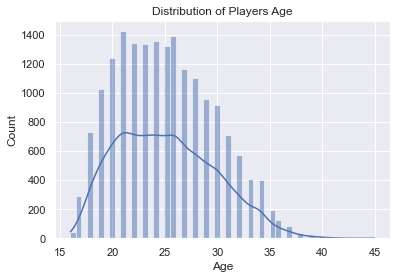

In [84]:
sns.histplot(df, x="Age", kde=True).set_title('Distribution of Players Age')

print("The median age of a player is:", df.Age.median())
print("The mean age of a player is:", df.Age.mean())
print("The oldest age is a player is:", df.Age.max(),".", "He is", df.loc[df['Age'].idxmax()]['Name'], "from", df.loc[df['Age'].idxmax()]['Club'])
print("The youngest age is a player is:", df.Age.min(),".", "He is", df.loc[df['Age'].idxmin()]['Name'], "from", df.loc[df['Age'].idxmin()]['Club'])

The Age distribution is positively skewed, with the Mode < Median < Mean. Like other atheletes or sportsman, footballers have a rather short career as it is an extremely physically demanding sport. Most players retire by 35 years old as their bodies are unable to keep up with the physical conditions of the sport.

### Overall

The median overall of a player is: 66.0
The mean overall rating of a player is: 66.23869940132916
The highest overall rating is a player is: 94 He is L. Messi from FC Barcelona
The lowest overall rating is a player is: 46 He is G. Nugent from Tranmere Rovers


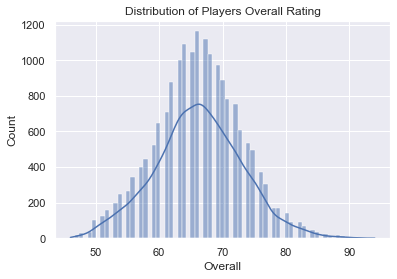

In [85]:
#sns.set_palette("pastel")

sns.histplot(df, x="Overall", kde=True).set_title('Distribution of Players Overall Rating')

print("The median overall of a player is:", df.Overall.median())
print("The mean overall rating of a player is:", df.Overall.mean()) 
print("The highest overall rating is a player is:", df.Overall.max(), "He is", df.loc[df['Overall'].idxmax()]['Name'], "from", df.loc[df['Overall'].idxmax()]['Club'])
print("The lowest overall rating is a player is:", df.Overall.min(), "He is", df.loc[df['Overall'].idxmin()]['Name'], "from", df.loc[df['Overall'].idxmin()]['Club'])

Players' Overall has a normal distribution with the Mode, Median and Mean being 66.

### Potential

The median potential of a player is: 71.0
The mean potential rating of a player is: 71.30729939034437
The highest potential rating is a player is: 95 He is K. Mbappé from Paris Saint-Germain
The lowest potential rating is a player is: 48 He is Y. Uchimura from Hokkaido Consadole Sapporo


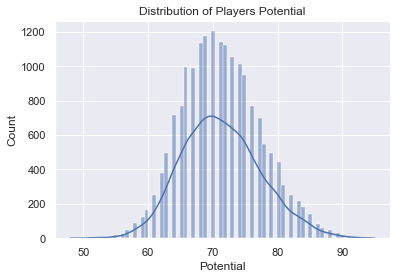

In [86]:
sns.histplot(df, x="Potential", kde=True).set_title('Distribution of Players Potential')

print("The median potential of a player is:", df.Potential.median())
print("The mean potential rating of a player is:", df.Potential.mean()) 
print("The highest potential rating is a player is:", df.Potential.max(), "He is", df.loc[df['Potential'].idxmax()]['Name'], "from", df.loc[df['Potential'].idxmax()]['Club'])
print("The lowest potential rating is a player is:", df.Potential.min(), "He is", df.loc[df['Potential'].idxmin()]['Name'], "from", df.loc[df['Potential'].idxmin()]['Club'])

Like players' overall, player's potential also have a normal distribution with the mean, median and mode being around 70-71.

### Overall vs Age

Text(0, 0.5, 'Overall')

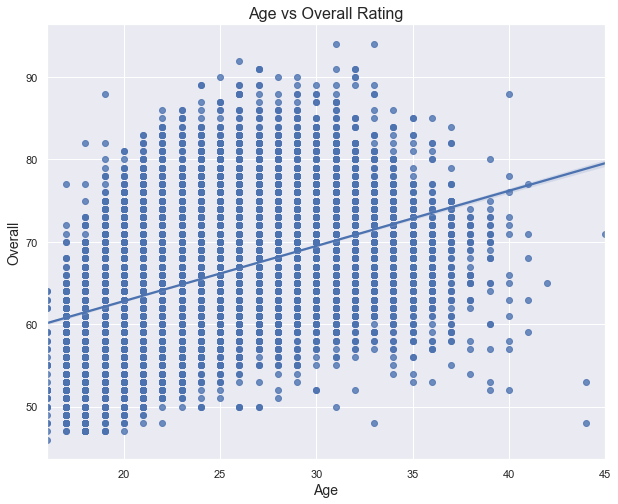

In [98]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(10, 8))
sns.regplot(x=df['Age'] , y=df['Overall']).set_title('Age vs Overall Rating', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Overall',fontsize=14)

As seen from the plot above, players gets better with age, as they play more games and gain more experience under their belt. Players peak at around 26-33 years old where their overall is the highest.

### Potential vs Age

Text(0, 0.5, 'Potential')

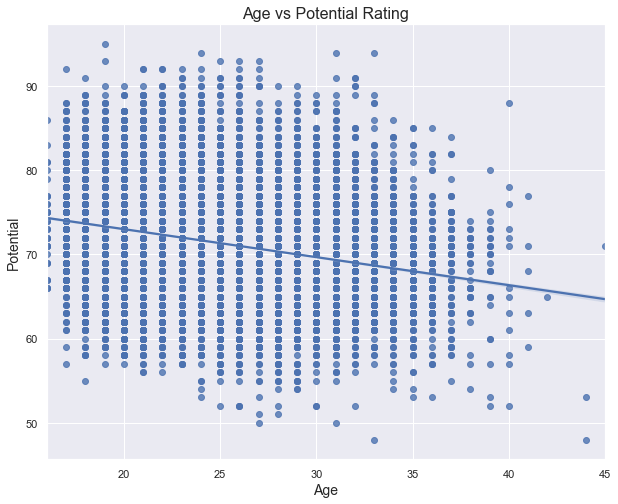

In [99]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(10, 8))
sns.regplot(x=df['Age'] , y=df['Potential']).set_title('Age vs Potential Rating', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Potential',fontsize=14)

As you grow older, your potential decreases. Player's potential are highest at around 21-27 years old. Hence a player's overall and potential have different relationships with regards to age.

### Sprint Speed vs Age

Text(0, 0.5, 'Sprint Speed')

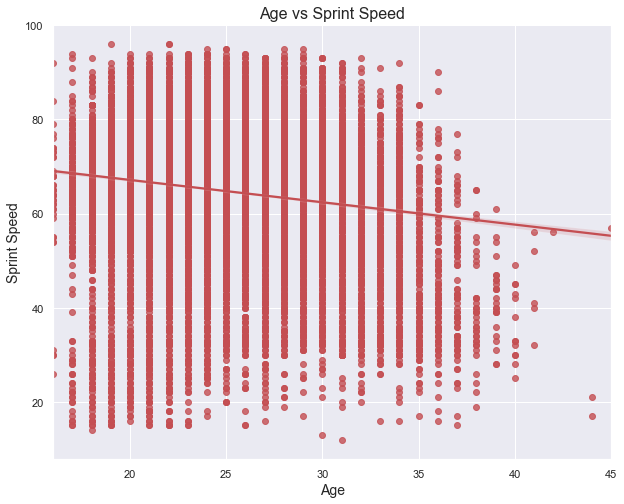

In [101]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(10, 8))
sns.regplot(x=df['Age'] , y=df['SprintSpeed'], color= 'r').set_title('Age vs Sprint Speed', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Sprint Speed',fontsize=14)

Text(0, 0.5, 'Acceleration')

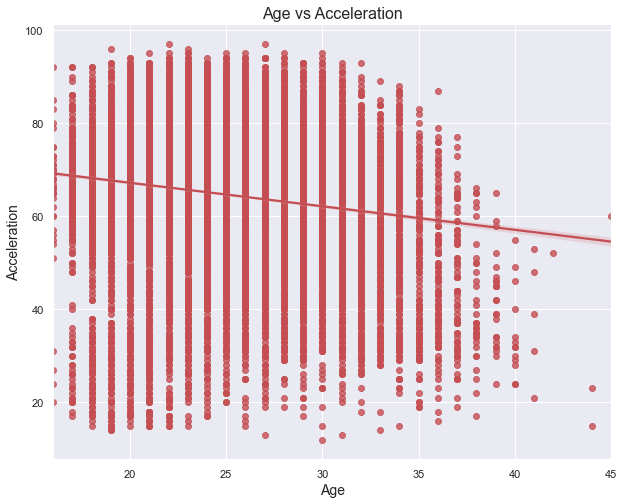

In [105]:
plt.figure(figsize=(10, 8))
sns.regplot(x=df['Age'] , y=df['Acceleration'], color= 'r').set_title('Age vs Acceleration', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Acceleration',fontsize=14)

Text(0, 0.5, 'Agility')

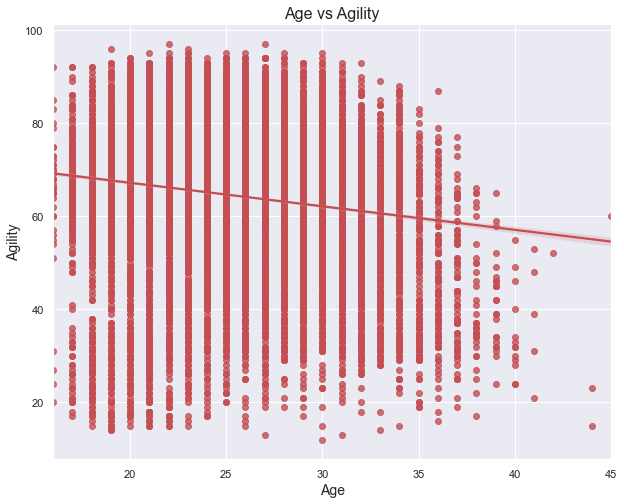

In [107]:
plt.figure(figsize=(10, 8))
sns.regplot(x=df['Age'] , y=df['Acceleration'], color = 'r').set_title('Age vs Agility', fontsize =16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Agility',fontsize=14)

In general, after a player reaches 30 years old, he becomes physically slower leading to slower agility, sprint speed and acceleration. This is natural among most atheletes and sports as their peak is usually around 27 years old and their speed will start to decline thereafter as they age.

Text(0.5, 1.0, 'Acceleration vs Sprint Speed')

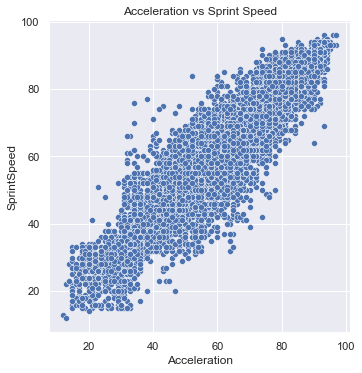

In [108]:
sns.relplot(x=df['Acceleration'] , y=df['SprintSpeed'])
plt.title('Acceleration vs Sprint Speed')

Sprint speed and Acceleration have linear relationship, hence they are directly proportional.

### Position

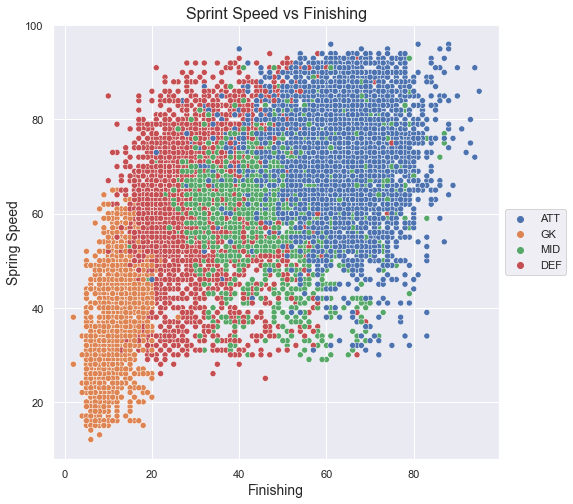

In [114]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(ax=ax, x="Finishing", y="SprintSpeed", hue="General Position", data=df).set_title('Sprint Speed vs Finishing', fontsize=16)
plt.xlabel('Finishing',fontsize=14)
plt.ylabel('Spring Speed',fontsize=14)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In the above plot, we can see that the players with the higher finishing scores are the forwards and midfielders as they are the ones who are more likely to score a goal for the team. They are also usually the faster players are they need to cover a huge amount of ground as quickly as possible.

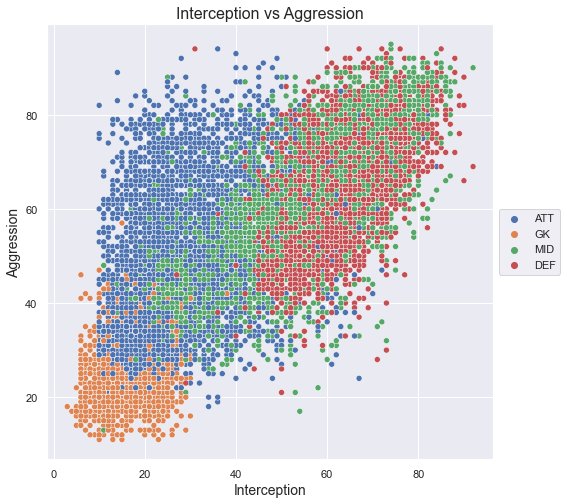

In [115]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(ax=ax, x="Interceptions", y="Aggression", hue="General Position", data=df).set_title('Interception vs Aggression', fontsize=16)
plt.xlabel('Interception',fontsize=14)
plt.ylabel('Aggression',fontsize=14)
        
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The defenders and midfielders are generally the ones with higher aggression and interceptions scores as they have more defensive duties as compared to the strikers. The goalkeepers are not considered an outfield position so these attributes are pretty irrelevant to them.

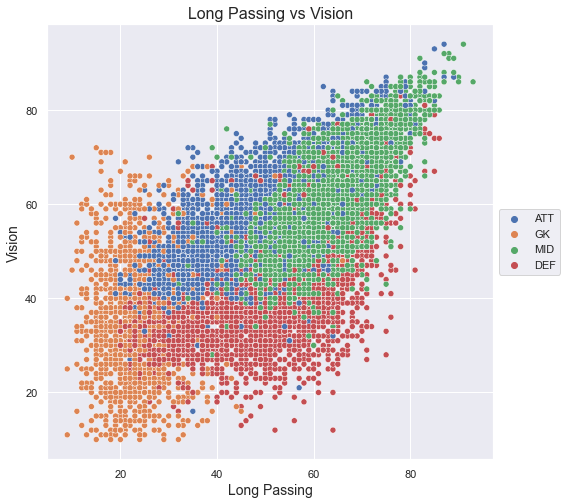

In [116]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(ax=ax, x="LongPassing", y="Vision", hue="General Position", data=df).set_title('Long Passing vs Vision', fontsize=16)
plt.xlabel('Long Passing',fontsize=14)
plt.ylabel('Vision',fontsize=14)
        
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The Midfielders are the ones with the highest vision and long passing scores in general as they are required to distribute the ball across the field and create chances for their teammates to score.

### Wage vs Age

Text(0.5, 1.0, 'Age vs Wage')

<Figure size 1152x864 with 0 Axes>

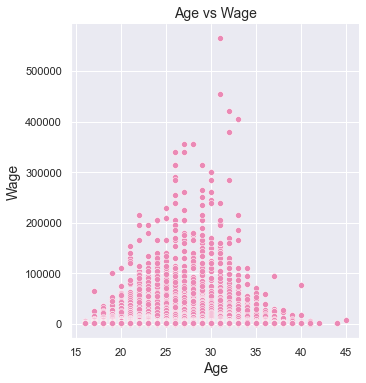

In [121]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(16, 12))
sns.relplot(x=df['Age'] , y=df['Wage'], color = '#EB89B5')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Wage',fontsize=14)
        
plt.title('Age vs Wage', fontsize=14)

From the plot, we can observe an upward trend as players age until about 31 years old after which it declines. Footballers and other sports athletes usually have a limited career length in the range of 10-15 years. Most of them peak at around 27 years old and retire at around 35 years old. As such, players earn the highest wage during their peak years from 27 years old to 31 years old. However, there are a few exceptional players that earn extremely high wages even after 30 years old. These are the best players in the game with very high overall and earnings.

### Preferred Foot

In [118]:
preferred_foot = df.groupby(['Preferred Foot']).size().reset_index(name='count')
preferred_foot

,Preferred Foot,count
0,Left,4211
1,Right,13996


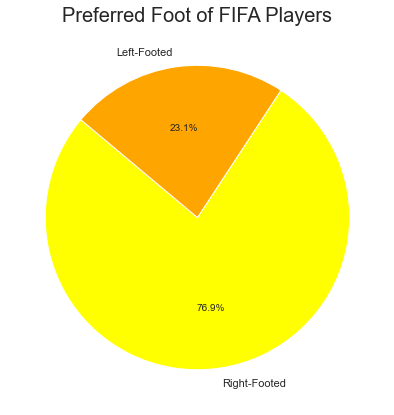

In [119]:
%matplotlib inline

plt.figure(figsize=(7,7))
labels = 'Right-Footed', 'Left-Footed'
pf = [13996, 4211]
colors = ['yellow', 'orange'] 
plt.pie(pf, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=140)
plt.title('Preferred Foot of FIFA Players', fontsize=20)
plt.show()

There are 13996 right footed players and 4211 left footed players. There are more right footed players than left footed players naturally.

In [82]:
df[df['Preferred Foot'] == 'Left'][['Name', 'Age', 'Overall', 'Club', 'Nationality']].head(10)

,Name,Age,Overall,Club,Nationality
0,L. Messi,31,94,FC Barcelona,Argentina
13,David Silva,32,90,Manchester City,Spain
15,P. Dybala,24,89,Juventus,Argentina
17,A. Griezmann,27,89,Atlético Madrid,France
19,T. Courtois,26,89,Real Madrid,Belgium
24,G. Chiellini,33,89,Juventus,Italy
26,M. Salah,26,88,Liverpool,Egypt
28,J. Rodríguez,26,88,FC Bayern München,Colombia
35,Marcelo,30,88,Real Madrid,Brazil
36,G. Bale,28,88,Real Madrid,Wales


In [83]:
df[df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Overall', 'Club', 'Nationality']].head(10)

,Name,Age,Overall,Club,Nationality
1,Cristiano Ronaldo,33,94,Juventus,Portugal
2,Neymar Jr,26,92,Paris Saint-Germain,Brazil
3,De Gea,27,91,Manchester United,Spain
4,K. De Bruyne,27,91,Manchester City,Belgium
5,E. Hazard,27,91,Chelsea,Belgium
6,L. Modrić,32,91,Real Madrid,Croatia
7,L. Suárez,31,91,FC Barcelona,Uruguay
8,Sergio Ramos,32,91,Real Madrid,Spain
9,J. Oblak,25,90,Atlético Madrid,Slovenia
10,R. Lewandowski,29,90,FC Bayern München,Poland


Above you can see the top 10 players in the game sorted by their preferred foot (Left or Right).

### Value

<Figure size 1152x864 with 0 Axes>

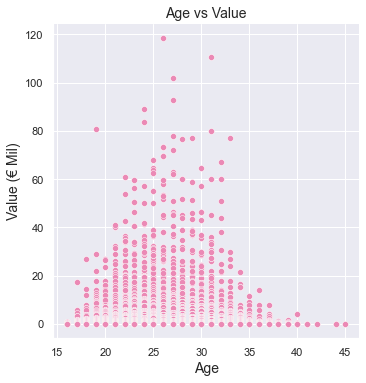

In [123]:
plt.figure(figsize=(16, 12))
sns.relplot(x=df['Age'] , y=df['Value (€ Mil)'], color = '#EB89B5')
plt.title('Age vs Value', fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Value (€ Mil)',fontsize=14)
sns.set_theme(color_codes=True)

Likewise for a players' value, it is highest at the typical peak at 27-31 years old. After 32 years a players' value and performance will start to decline rapidly as he approaches retirement. However, there are still a few cases of exceptional players who are above 32 years old but playing at the top of their game. As such their values are still very high despite their age. Those are the legends of this sport.

Text(0, 0.5, 'Value (€ Mil)')

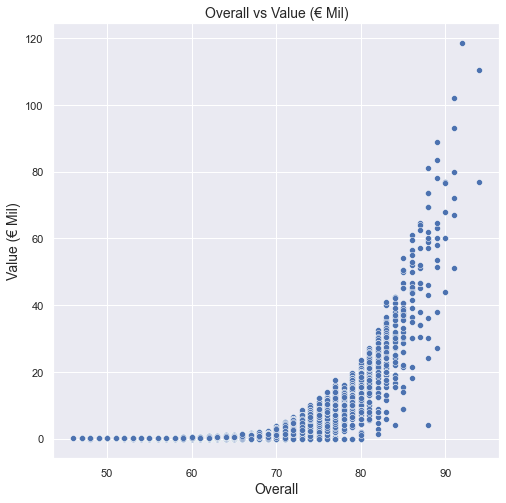

In [124]:
plt.figure(figsize=(8,8))
sns.scatterplot(df["Overall"], df['Value (€ Mil)'])
plt.title('Overall vs Value (€ Mil)', fontsize=14)
plt.xlabel('Overall',fontsize=14)
plt.ylabel('Value (€ Mil)',fontsize=14)

A player's overall has a great effect on a player's value as the players with higher overall score are the ones with higher valuation.

In [125]:
df_value = df.drop_duplicates(subset='Name', keep='first')

In [126]:
df_value = df_value.groupby('Name').sum().sort_values('Value (€ Mil)', ascending=False).iloc[:30]

Text(0, 0.5, 'Player')

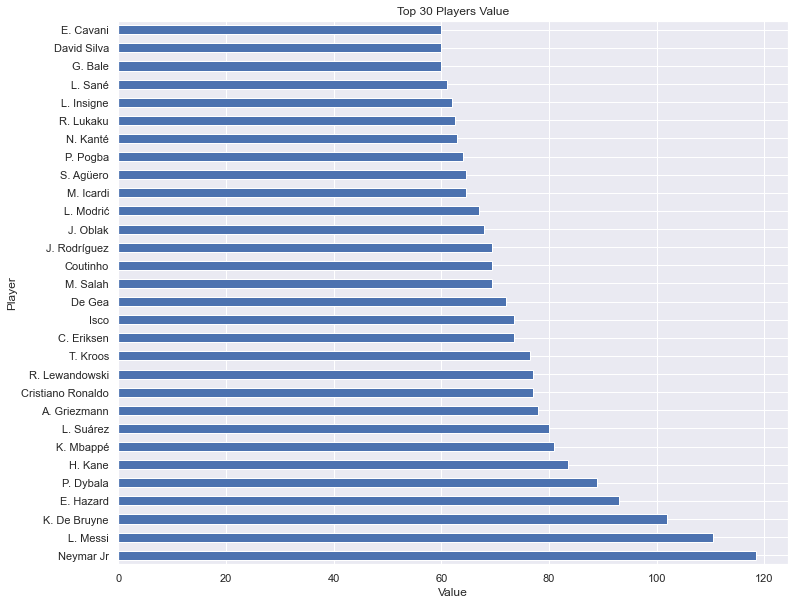

In [87]:
# Top 30 players value
df_value['Value (€ Mil)'].plot(kind='barh', figsize=(12,10))
plt.title("Top 30 Players Value")
plt.xlabel("Value")
plt.ylabel("Player")

The most expensive players in the game are famous household names, known by almost all football fans. Neymar tops the list, followed by Messi and De Bruyne.

The mean value of a player is: $ 2.4105053001591745
The most expensive player is worth: $ 118.5 He is Neymar Jr from Paris Saint-Germain
The Cheapest player is worth: $ 0.0 He is L. Paredes from Free Agent


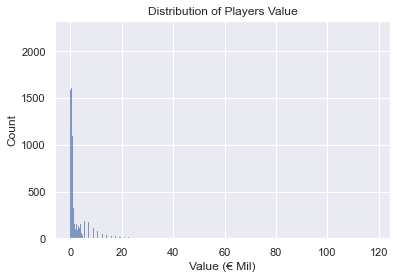

In [127]:
sns.histplot(data=df, x="Value (€ Mil)").set_title('Distribution of Players Value')

print("The mean value of a player is: $", df['Value (€ Mil)'].mean())
print("The most expensive player is worth: $", df['Value (€ Mil)'].max(), "He is", df.loc[df['Value (€ Mil)'].idxmax()]['Name'], "from", df.loc[df['Value (€ Mil)'].idxmax()]['Club'])
print("The Cheapest player is worth: $", df['Value (€ Mil)'].min(), "He is", df.loc[df['Value (€ Mil)'].idxmin()]['Name'], "from", df.loc[df['Value (€ Mil)'].idxmin()]['Club'])

#### Applying log to Value

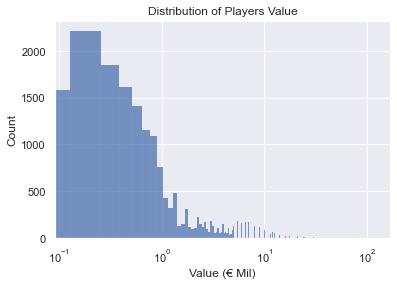

In [128]:
sns.histplot(data=df, x="Value (€ Mil)").set_title('Distribution of Players Value')
plt.xscale('log')

With log applied, the model is transformed to improve the fit of the model.

### Wages

In [129]:
df_wage = df.drop_duplicates(subset='Name', keep='first')

In [130]:
df_wage = df_wage.groupby('Name').sum().sort_values('Wage', ascending=False).iloc[:30]

The top earner has a wage of : $ 565000.0 He is L. Messi from FC Barcelona


Text(0, 0.5, 'Player')

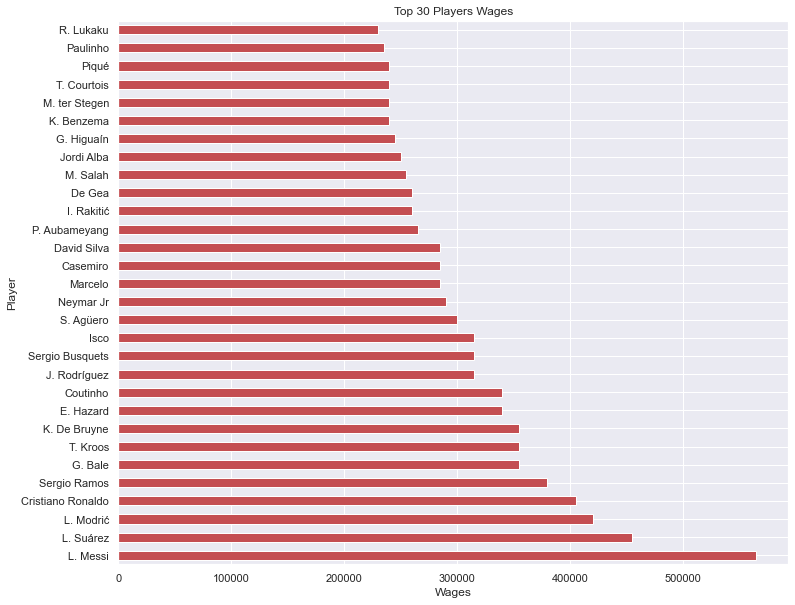

In [131]:
# Top 30 players wages
print("The top earner has a wage of : $", df.Wage.max(), "He is", df.loc[df['Wage'].idxmax()]['Name'], "from", df.loc[df['Wage'].idxmax()]['Club'])
df_wage['Wage'].plot(kind='barh', figsize=(12,10), color='r')
plt.title("Top 30 Players Wages")
plt.xlabel("Wages")
plt.ylabel("Player")

These are the top earners with this highest wages in the game, mostly belonging to the bigger clubs who are financially powerful and can afford to pay the player a huge sum of money.

### Clubs & Countries

In [132]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)

countries = (df['Nationality'].value_counts().head(5))
print("The top 3 countries with the most number of players in FIFA 19 are:",
      countries.index[0], ",", countries.index[1], "and", countries.index[2])

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------
The top 3 countries with the most number of players in FIFA 19 are: England , Germany and Spain


In [133]:
num_clubs = len(df['Club'].unique())
print("There are", num_clubs ,"different football clubs in the game.")

There are 652 different football clubs in the game.


In [134]:
top20_clubs = df.groupby(['Club'], as_index=False)['Overall'].mean()
top20_clubs['Overall'] = round(top20_clubs['Overall'],2)
top20_clubs = top20_clubs.sort_values('Overall',ascending=False).head(20)

Text(0, 0.5, 'Overall')

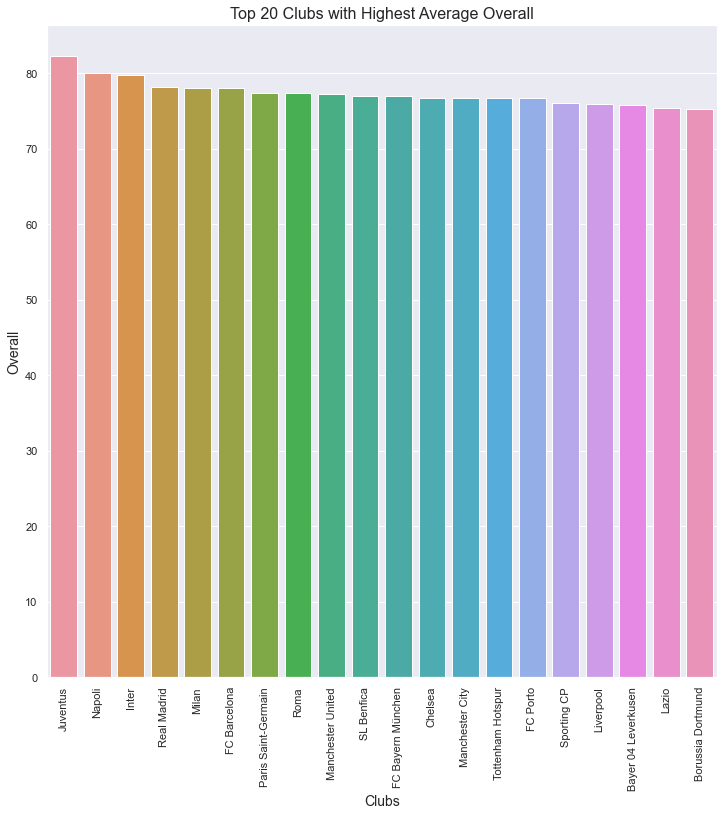

In [96]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation=90)
sns.barplot(x = 'Club', y = 'Overall', data = top20_clubs)
plt.title("Top 20 Clubs with Highest Average Overall", fontsize=16)
plt.xlabel("Clubs", fontsize=14)
plt.ylabel("Overall", fontsize=14)

The top 3 clubs with the highest average overall are Juventus, Napoli and Inter Milan.

### Attributes

Now let's find out the best players with the highest rating for each attribute!

In [135]:
attributes =['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
           'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
           'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
           'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
           'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
           'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
           'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('Top Player in Each Attribute :')
#print('_________________________\n\n')

i=0
while i < len(attributes):
    print('Highest {0} : {1}'.format(attributes[i],df.loc[df[attributes[i]].idxmax()][1]))
    i += 1

Top Player in Each Attribute :
Highest Crossing : K. De Bruyne
Highest Finishing : L. Messi
Highest HeadingAccuracy : Naldo
Highest ShortPassing : L. Modrić
Highest Volleys : E. Cavani
Highest Dribbling : L. Messi
Highest Curve : Quaresma
Highest FKAccuracy : L. Messi
Highest LongPassing : T. Kroos
Highest BallControl : L. Messi
Highest Acceleration : Douglas Costa
Highest SprintSpeed : K. Mbappé
Highest Agility : Neymar Jr
Highest Reactions : Cristiano Ronaldo
Highest Balance : Bernard
Highest ShotPower : Cristiano Ronaldo
Highest Jumping : Cristiano Ronaldo
Highest Stamina : N. Kanté
Highest Strength : A. Akinfenwa
Highest LongShots : L. Messi
Highest Aggression : B. Pearson
Highest Interceptions : N. Kanté
Highest Positioning : Cristiano Ronaldo
Highest Vision : L. Messi
Highest Penalties : M. Balotelli
Highest Composure : L. Messi
Highest Marking : A. Barzagli
Highest StandingTackle : G. Chiellini
Highest SlidingTackle : Sergio Ramos
Highest GKDiving : De Gea
Highest GKHandling : J

### Correlation HeatMap

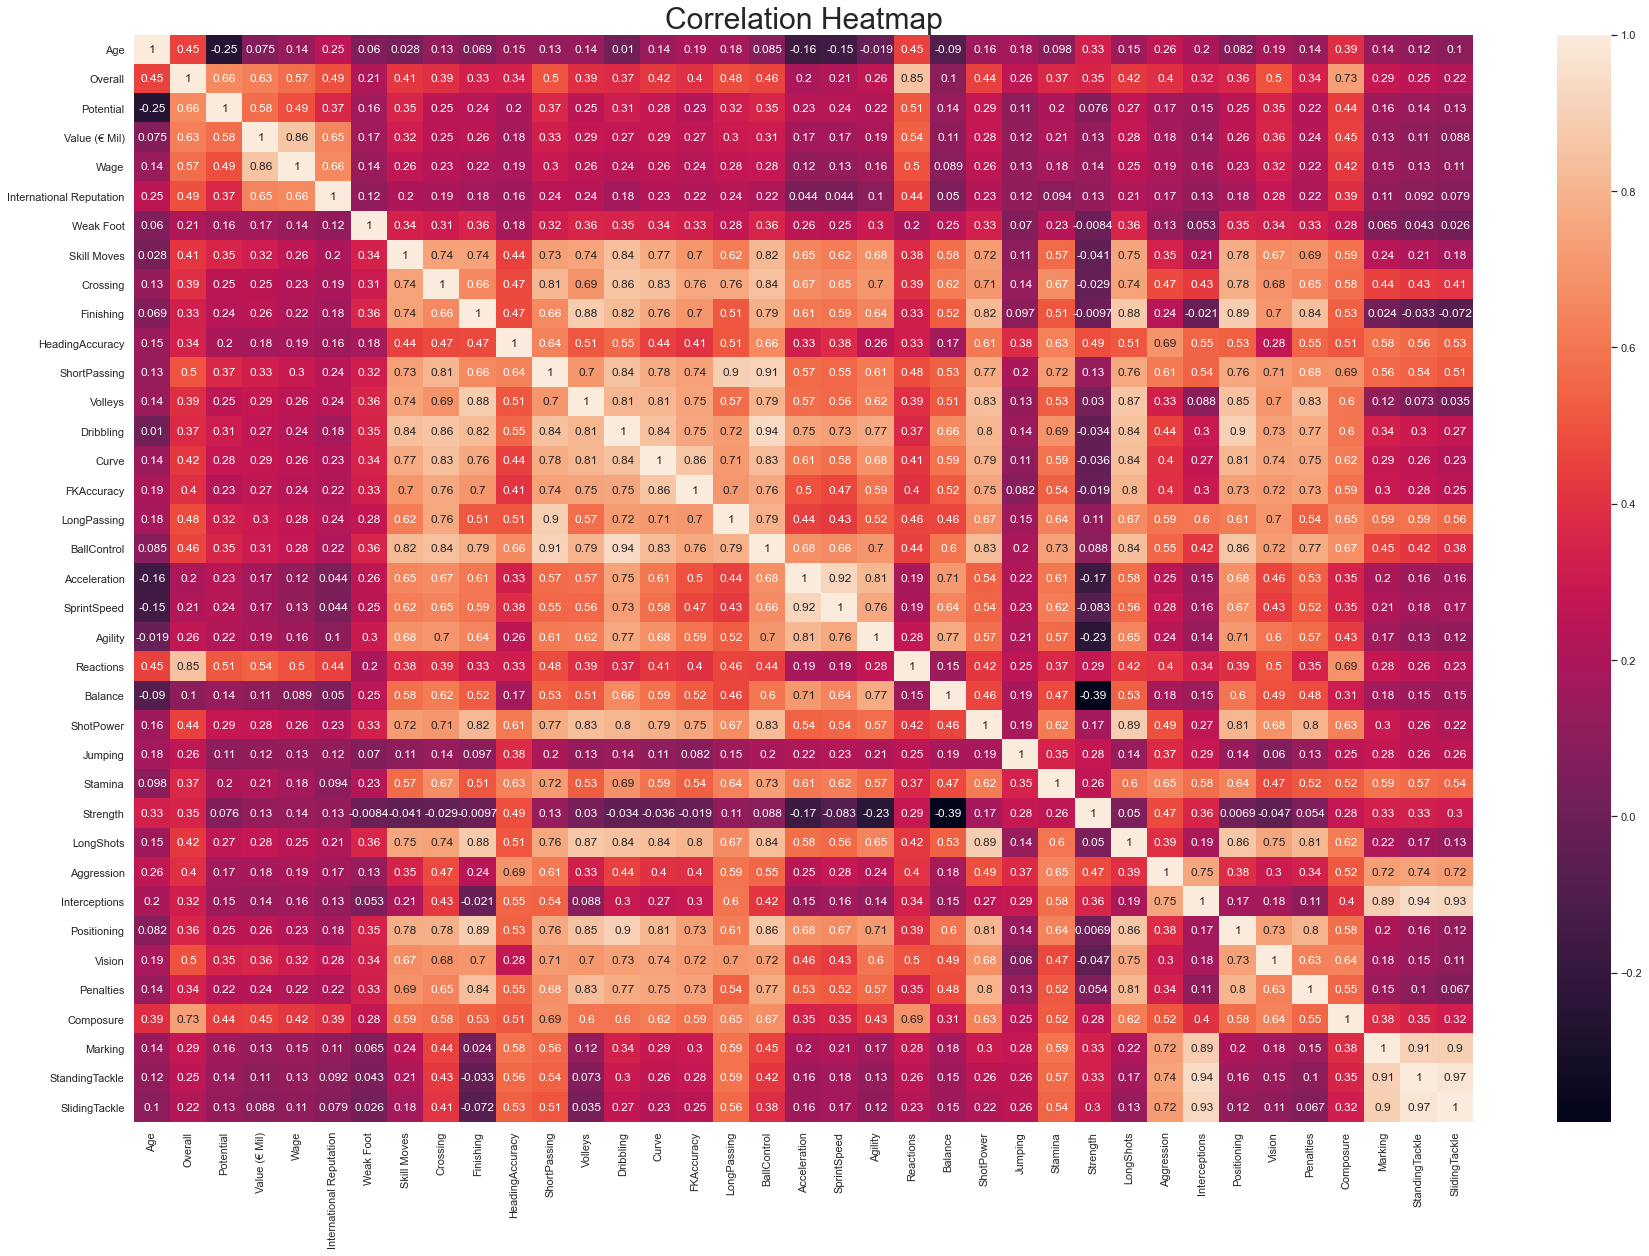

In [136]:
# plotting a correlation heatmap
#adapted from sharmaro shan

corr_heatmap = df.drop(['ID','GKDiving', 'GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)

plt.rcParams['figure.figsize'] = (30, 20)
#sns.heatmap(df.corr(), annot = True)
sns.heatmap(corr_heatmap.corr(), annot = True)

plt.title('Correlation Heatmap', fontsize = 30)
plt.show()

### Top 10 Variables with Highest Correlation to Player's Value

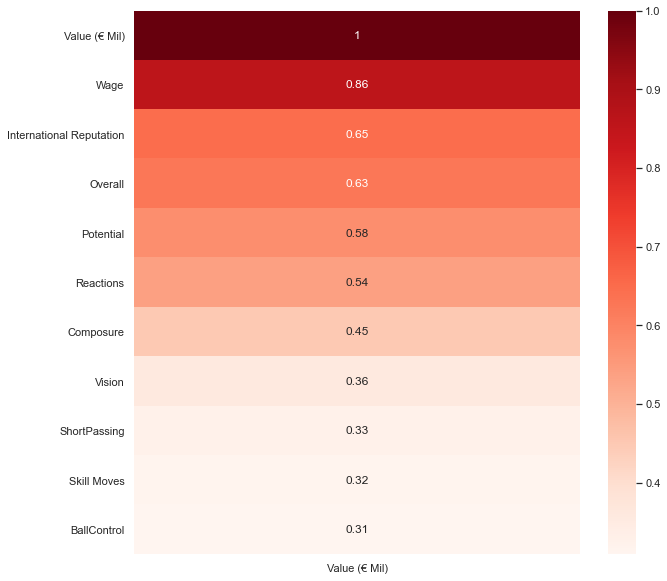

In [137]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Value (€ Mil)']].sort_values('Value (€ Mil)', ascending=False).head(11), annot=True, cmap='Reds');

As shown above, the top 3 features with the highest corelation to value are wage, international reputation and overall.

In [138]:
#df.to_csv('../data/df_clean.csv', index=False)

### Summary of EDA Insights:
From the data visualizations we can make multiple observations.

(1) Most players are right footed

(2) Players' overall and potential are usually at their highest when they are around 27-31 years old which is the generally the peak of a footballer's career.

(3) Similarly for earnings, a typical players wage is highest his peak with an exception of the top players in the game which earns way above the average wage despite being above 30.

(4) Agility, Sprint Speed and Acceleration are related and directly proportionate. These attributes will decline as a player age past 30 years old.

(5) The top 3 countries with the most players in the game are England, Germany and Spain. It is not surprising however, considering these 3 nations are famously associated with football.